In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import plotly.graph_objs as go
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)
plt.style.use("dark_background")  

In [2]:
df_hmless= pd.read_csv("Data/homelessness-07to16.csv")

In [3]:
df_hmless.head()

,Year,State,CoC Number,CoC Name,Measures,Count
0,1/1/2007,AK,AK-500,Anchorage CoC,Chronically Homeless Individuals,224
1,1/1/2007,AK,AK-500,Anchorage CoC,Homeless Individuals,696
2,1/1/2007,AK,AK-500,Anchorage CoC,Homeless People in Families,278
3,1/1/2007,AK,AK-500,Anchorage CoC,Sheltered Chronically Homeless Individuals,187
4,1/1/2007,AK,AK-500,Anchorage CoC,Sheltered Homeless,842


In [4]:

df_hmless.tail()

,Year,State,CoC Number,CoC Name,Measures,Count
86524,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Homeless Unaccompanied Youth (Unde...,7
86525,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Homeless Veterans,31
86526,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Parenting Youth (Under 25),3
86527,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Parenting Youth Age 18-24,3
86528,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Parenting Youth Under 18,0


In [5]:
df_hmless['Count'] = df_hmless['Count'].str.replace(',','').astype(np.int64)
df_hmless["Year"]=pd.to_datetime(df_hmless["Year"])

In [6]:
df_hmless.dtypes

Year          datetime64[ns]
State                 object
CoC Number            object
CoC Name              object
Measures              object
Count                  int64
dtype: object

In [7]:
newdf=df_hmless.copy()
newdf.head()

,Year,State,CoC Number,CoC Name,Measures,Count
0,2007-01-01,AK,AK-500,Anchorage CoC,Chronically Homeless Individuals,224
1,2007-01-01,AK,AK-500,Anchorage CoC,Homeless Individuals,696
2,2007-01-01,AK,AK-500,Anchorage CoC,Homeless People in Families,278
3,2007-01-01,AK,AK-500,Anchorage CoC,Sheltered Chronically Homeless Individuals,187
4,2007-01-01,AK,AK-500,Anchorage CoC,Sheltered Homeless,842


In [8]:
newdf.drop(["CoC Number", "CoC Name"], axis =1, inplace=True)

In [9]:
newdf.head(3)

,Year,State,Measures,Count
0,2007-01-01,AK,Chronically Homeless Individuals,224
1,2007-01-01,AK,Homeless Individuals,696
2,2007-01-01,AK,Homeless People in Families,278


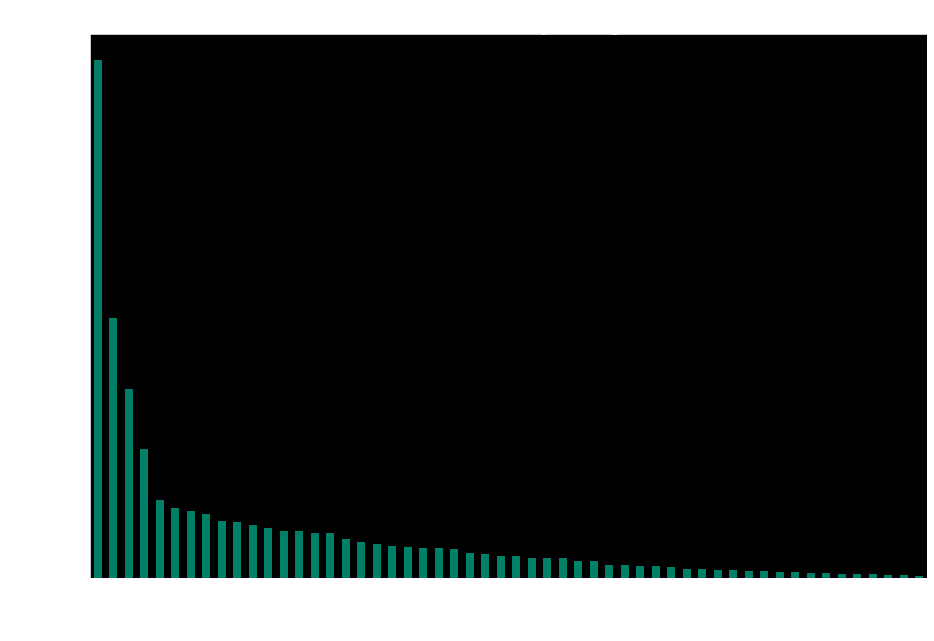

In [10]:
# Total Count by state
newdf.groupby("State")["Count"].sum().sort_values(ascending =False).plot.bar(title = "Total Count by State", colormap ="summer", figsize=(15,10))

plt.xlabel("States", fontdict ={"fontsize": 28})
plt.ylabel("Number of Homeless Count",fontdict={"fontsize": 28} )
plt.title("Total Number of Homeless People By States (2007-2016)", fontdict={'fontsize':28})
plt.savefig("Image_zha/Homeless_count1.png")
plt.show()


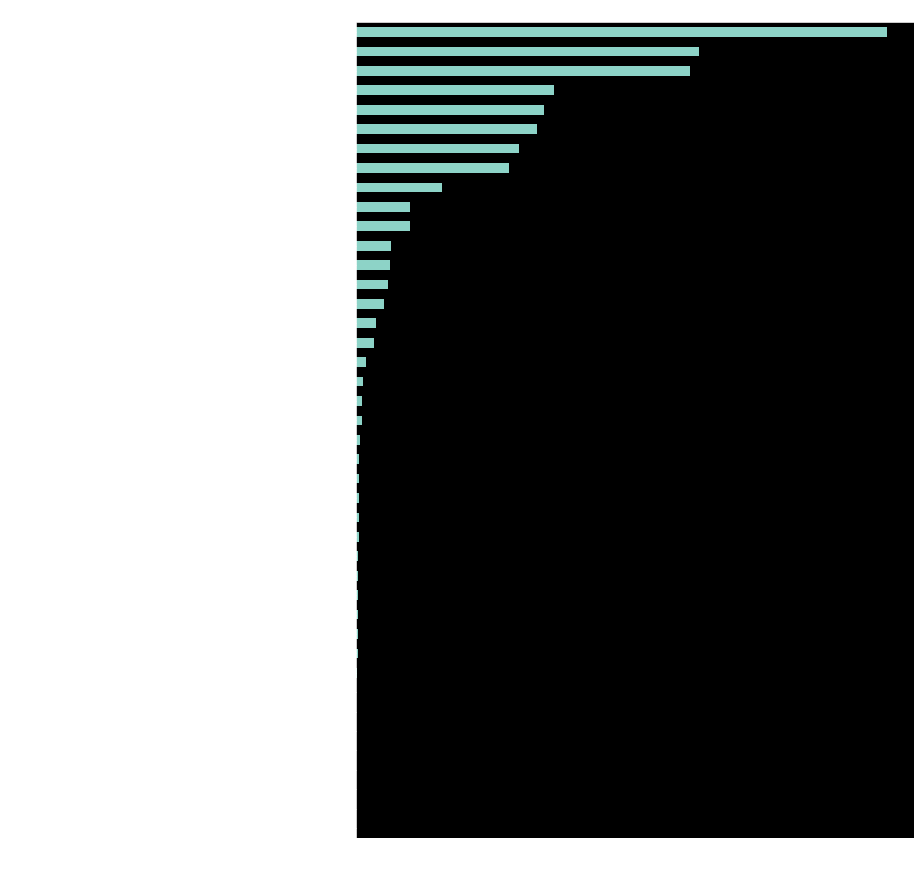

In [11]:
#Total count by mearsure
newdf.groupby("Measures")["Count"].sum().sort_values().plot(kind='barh', title ='Total Count by Measure', figsize =(10,15))
plt.xlabel("Count", fontdict ={"fontsize": 28})
# plt.ylabel("Number of Homeless Count",fontdict={"fontsize": 28} )
# plt.title("Total Number of Homeless People According to States (2007-2016)", fontdict={'fontsize':28})
plt.savefig("Image_zha/Measure_count.png")
plt.show()

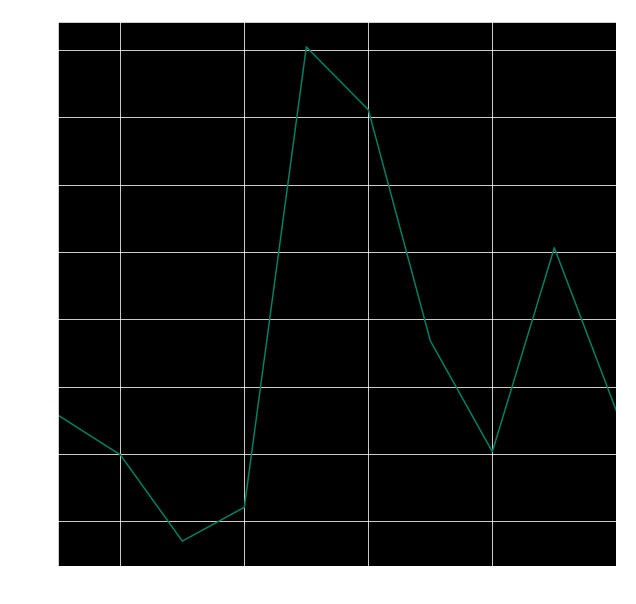

In [13]:
#Total count by year
newdf.groupby("Year")["Count"].sum().plot(y='Count', kind = "line", title ="Total Count by Year", colormap="summer",\
                                         figsize=(10,10))
plt.grid()
plt.savefig("Image_zha/Total_count_by_year.png")
plt.show()

In [14]:
#explore CA homeless with measures
califa= newdf[newdf.State=="CA"]
ca_series= califa.groupby(["Year", "Measures"])["Count"].sum()
type(ca_series)


pandas.core.series.Series

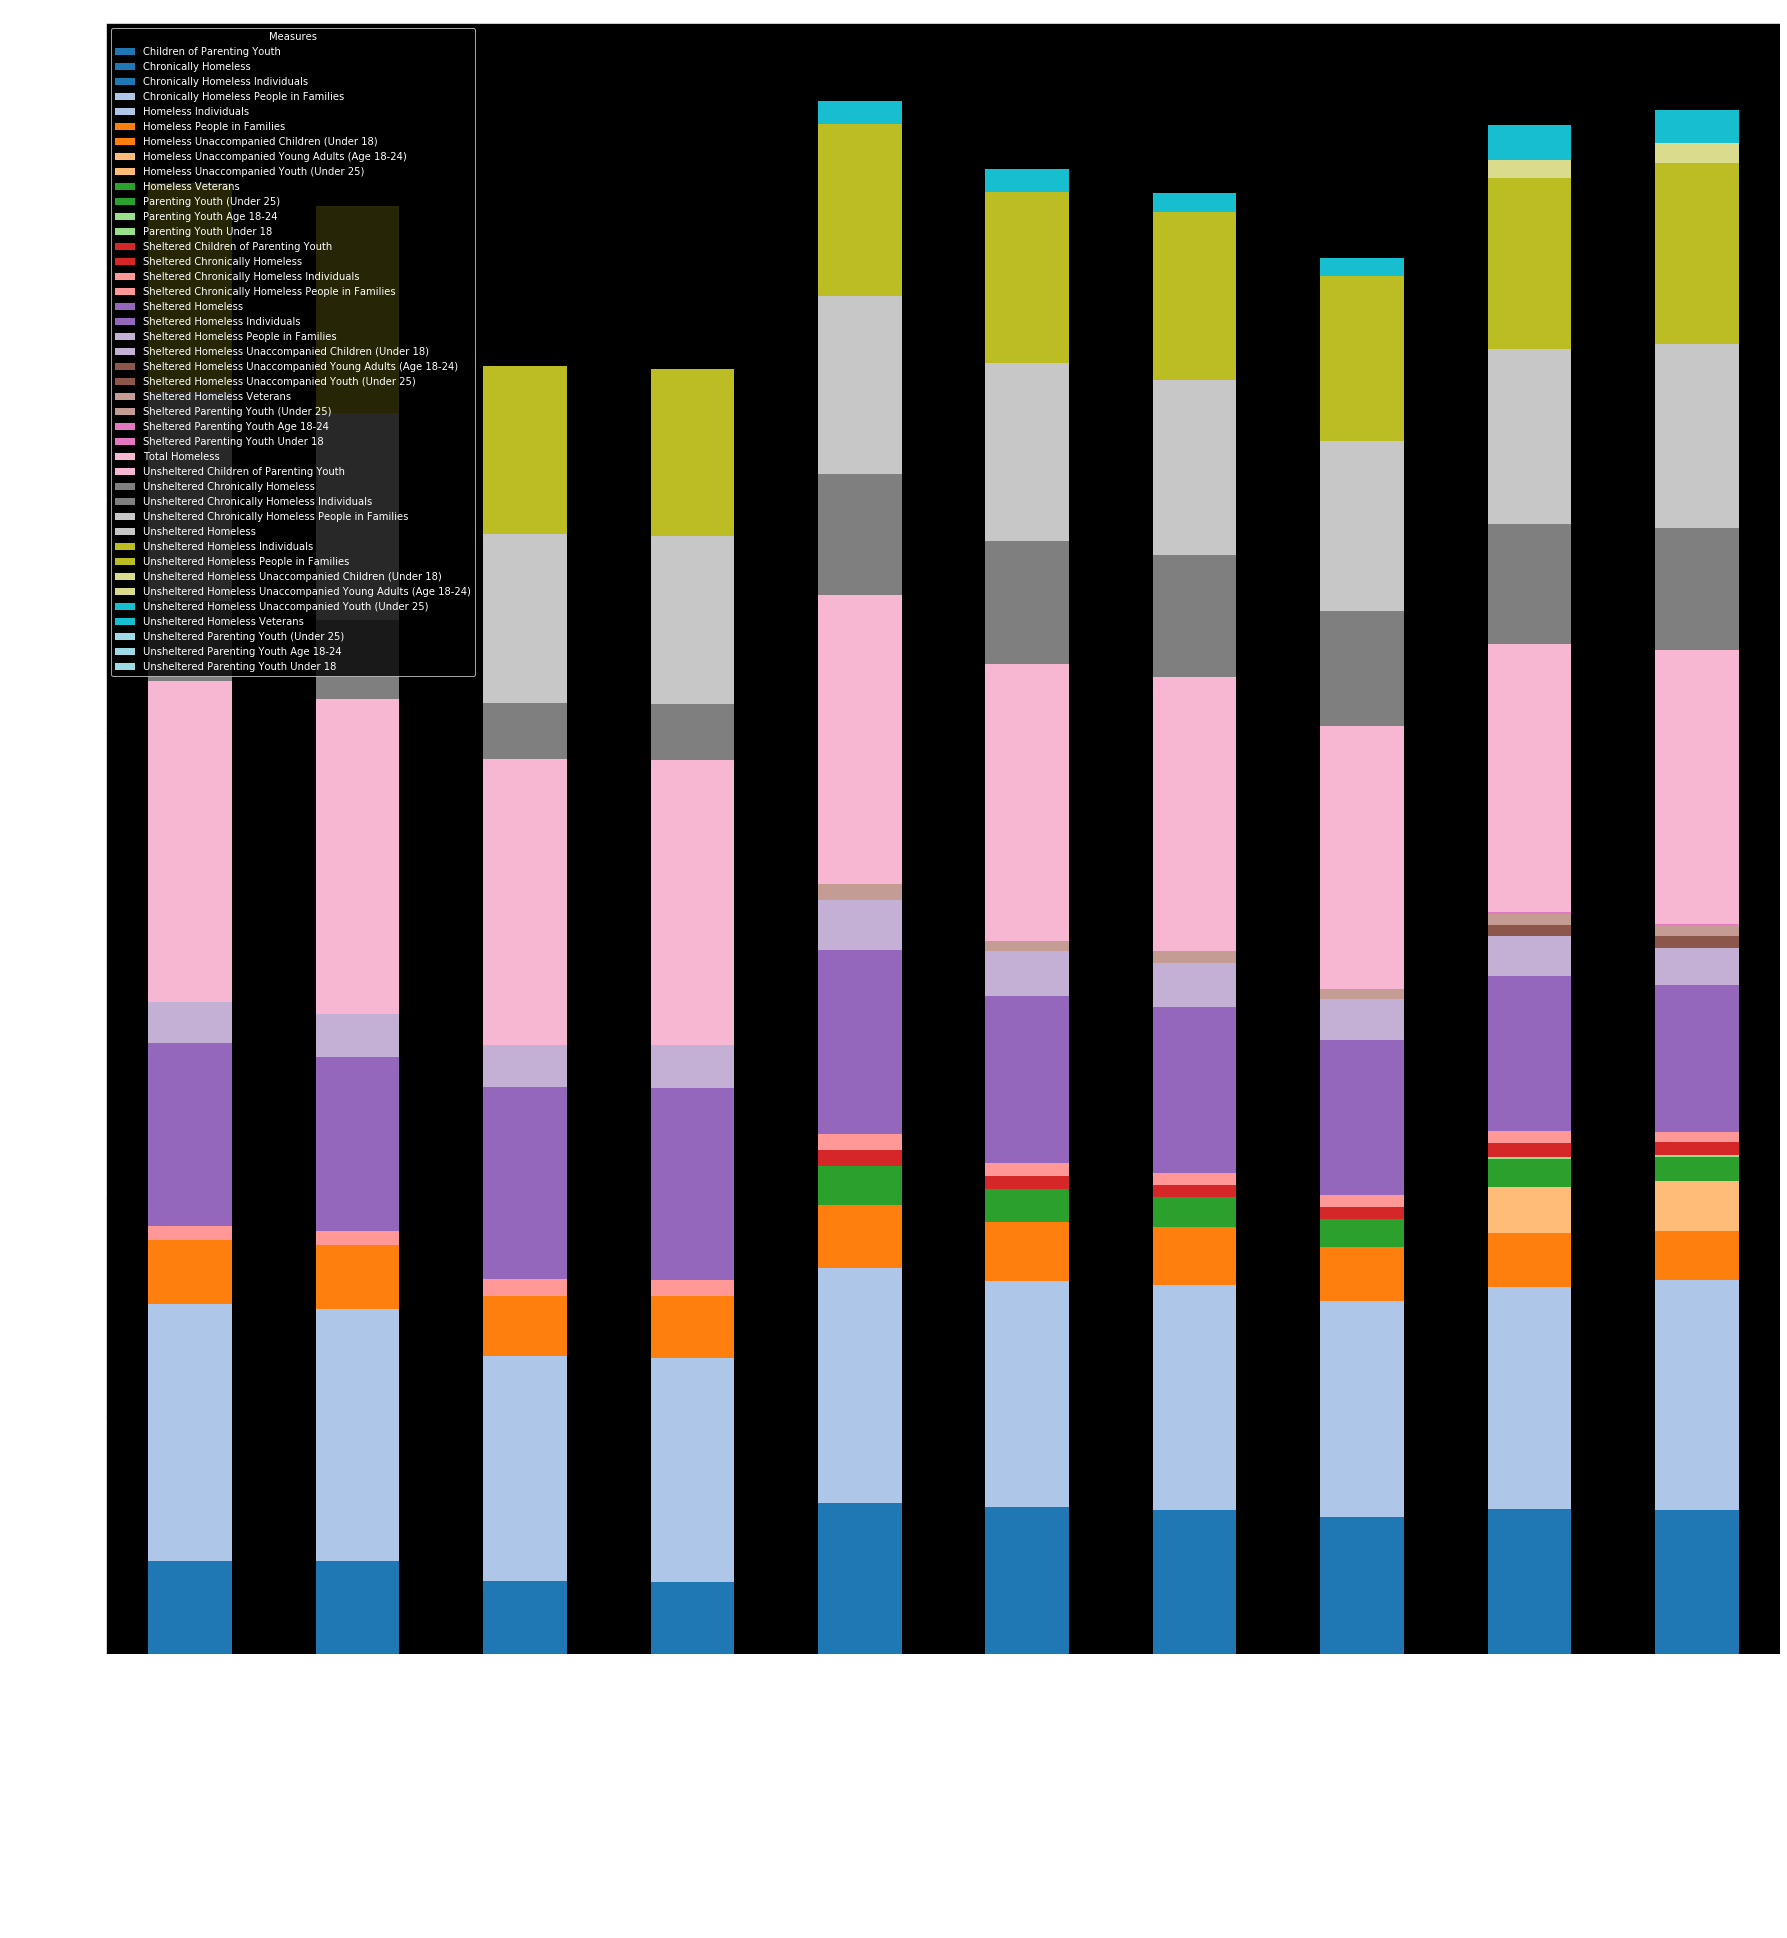

In [15]:
califa.groupby(["Year", "Measures"])["Count"].sum().unstack().plot.bar(stacked=True, title = "Years Stacked by Measures", colormap ='tab20', figsize=(30,30), fontsize=24),
#plt.grid()
plt.savefig("Image_zha/CA_Total_count_by_year_measure.png")
plt.show()

In [16]:
sfh_df = pd.read_csv("Data/sfh_price.csv")
sfh_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,...,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30
0,102001,0,United States,Country,NaN,275000.0,274345.0,272863.0,272123.0,272398.0,...,318225.0,314475.0,309475.0,305475.0,301975.0,299738.0,303488.0,308713.0,316438.0,326175.0
1,394913,1,"New York, NY",Msa,NY,500900.0,500450.0,500267.0,500200.0,506225.0,...,568974.0,567499.0,567499.0,569000.0,569000.0,570500.0,577750.0,584250.0,591750.0,598000.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,849999.0,849999.0,852999.0,854750.0,862000.0,...,936225.0,939000.0,942725.0,948197.0,959669.0,982169.0,1007194.0,1010972.0,1014750.0,1027000.0
3,394463,3,"Chicago, IL",Msa,IL,324900.0,321400.0,315600.0,312950.0,313975.0,...,345175.0,338675.0,331200.0,324927.0,319725.0,320100.0,327075.0,334600.0,343325.0,350700.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,345000.0,343575.0,344017.0,344763.0,347238.0,...,350373.0,346870.0,345123.0,342998.0,340498.0,339225.0,339700.0,339950.0,343700.0,348724.0


In [17]:
sfh_df["avg_2017"]= (sfh_df["2017-10-31"]+sfh_df["2017-11-30"]+sfh_df["2017-12-31"])/3

In [18]:
sfh_ndf= sfh_df.groupby("StateName", as_index=False).mean()

In [19]:
sfh_price_cleaned = sfh_ndf[["StateName", "avg_2017"]]

sfh_price_renamed=sfh_price_cleaned.rename(columns={
    "StateName": "State",
    "avg_2017": "2017"
})
sfh_price_renamed.head()

,State,2017
0,AL,213555.000000
1,AR,180400.000000
2,AZ,299368.333333
3,CA,587259.666667
4,CO,449797.533333


In [20]:
homeless_2017 = pd.read_excel("Data/2017_hmls.xlsx")
homeless_2017.info()                         

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 45 columns):
CoC Number                                                           400 non-null object
CoC Name                                                             400 non-null object
State                                                                399 non-null object
Total Homeless, 2017                                                 400 non-null float64
Sheltered Homeless, 2017                                             400 non-null float64
Unsheltered Homeless, 2017                                           400 non-null float64
Homeless Individuals, 2017                                           400 non-null float64
Sheltered Homeless Individuals, 2017                                 400 non-null float64
Unsheltered Homeless Individuals, 2017                               400 non-null float64
Homeless People in Families, 2017                                    400 non-null float6

In [21]:
hmls_2017_group_df= homeless_2017.groupby("State", as_index=False).sum()
hmls_2017_group_df.head()

,State,"Total Homeless, 2017","Sheltered Homeless, 2017","Unsheltered Homeless, 2017","Homeless Individuals, 2017","Sheltered Homeless Individuals, 2017","Unsheltered Homeless Individuals, 2017","Homeless People in Families, 2017","Sheltered Homeless People in Families, 2017","Unsheltered Homeless People in Families, 2017",...,"Unsheltered Parenting Youth (Under 25), 2017","Parenting Youth Under 18, 2017","Sheltered Parenting Youth Under 18, 2017","Unsheltered Parenting Youth Under 18, 2017","Parenting Youth Age 18-24, 2017","Sheltered Parenting Youth Age 18-24, 2017","Unsheltered Parenting Youth Age 18-24, 2017","Children of Parenting Youth, 2017","Sheltered Children of Parenting Youth, 2017","Unsheltered Children of Parenting Youth, 2017"
0,AK,1845.0,1551.0,294.0,1354.0,1060.0,294.0,491.0,491.0,0.0,...,0.0,0.0,0.0,0.0,22.0,22.0,0.0,39.0,39.0,0.0
1,AL,3793.0,2656.0,1137.0,2985.0,1950.0,1035.0,808.0,706.0,102.0,...,3.0,6.0,6.0,0.0,23.0,20.0,3.0,39.0,35.0,4.0
2,AR,2467.0,1273.0,1194.0,2068.0,937.0,1131.0,399.0,336.0,63.0,...,0.0,0.0,0.0,0.0,10.0,10.0,0.0,13.0,13.0,0.0
3,AZ,8947.0,5781.0,3166.0,6488.0,3423.0,3065.0,2459.0,2358.0,101.0,...,0.0,0.0,0.0,0.0,81.0,81.0,0.0,112.0,112.0,0.0
4,CA,134278.0,42636.0,91642.0,112756.0,25022.0,87734.0,21522.0,17614.0,3908.0,...,234.0,16.0,11.0,5.0,874.0,645.0,229.0,1058.0,782.0,276.0


In [22]:
hmls_2017_final_df = hmls_2017_group_df[["State","Total Homeless, 2017" ]]

In [23]:
merged_df1 = pd.merge(hmls_2017_final_df, sfh_price_renamed, on= "State", how= "inner")
merged_df1.head()
merged_df1= merged_df1.rename(columns={
    "Total Homeless, 2017": "Count", 
    "State": "state", 
  })
merged_df1.head()
merged_df1.sort_values(by="Count", ascending=False).head()

,state,Count,2017
3,CA,134278.0,587259.666667
27,NY,89503.0,243951.000000
7,FL,32190.0,301367.333333
35,TX,23548.0,282727.791667
38,WA,21112.0,511930.666667


The correlation between homelessness and the average housing price is 0.33


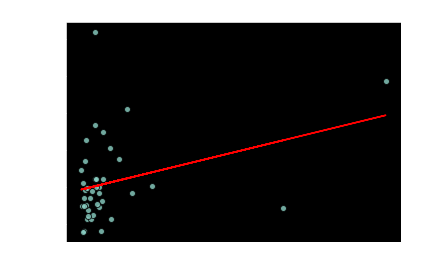

In [26]:
corr=round(st.pearsonr(merged_df1['Count'],merged_df1['2017'])[0],2)
print(f"The correlation between homelessness and the average housing price is {corr}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(merged_df1['Count'],merged_df1['2017'])
y_values = merged_df1['Count']*slope+intercept
plt.scatter(merged_df1['Count'], merged_df1['2017'],edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)
plt.plot(merged_df1['Count'],y_values,color="red")
plt.title("Scatter")
plt.xlabel('Homelessness Count')
plt.ylabel('Housing Price (2017)', fontdict={"fontsize": 10} )
#plt.gca().update(dict(title='SCATTER', xlabel='Count', ylabel='Housing Price($)', ylim=(0,10)))

plt.tight_layout()
plt.savefig("Image_zha/cor4.png")
plt.show()

In [25]:
data = dict(type='choropleth',
            colorscale = 'Jet',
            reversescale = True,
            locations = merged_df1['state'],
            z = merged_df1['Count'],
            locationmode = 'USA-states',
            text = merged_df1['state'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 1)),
            colorbar = {'title':'Total Homelessness Count For U.S.'}
            ) 

layout = dict(title = 'Total Homeless Population Count In 2017 For U.S.',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

In [27]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)